In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Questions to Answer
- Who are the customers that bring the most revenue to the company?
- Who are the customers who could bring more revenue to the company?
- To which campaigns do these customers respond?
- Where do different groups of customer shop? (in store, online, over catalog)
- Any additional business insights about the customers?

### Steps
0. Analysis Objectives 
1. Get and clean the data
2. Exploratory Data Analysis and feature engineering (
3. K-Means clustering
4. Analysis of clusters
5. Business Recommendations


Data source: https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis
or https://www.kaggle.com/datasets/jackdaoud/marketing-data?select=ifood_df.csv

In [12]:
# Attributes

# People

# ID: Customer's unique identifier
# Year_Birth: Customer's birth year
# Education: Customer's education level
# Marital_Status: Customer's marital status
# Income: Customer's yearly household income
# Kidhome: Number of children in customer's household
# Teenhome: Number of teenagers in customer's household
# Dt_Customer: Date of customer's enrollment with the company
# Recency: Number of days since customer's last purchase
# Complain: 1 if the customer complained in the last 2 years, 0 otherwise
# Country: Abbreviated country code
    
# Products

# MntWines: Amount spent on wine in last 2 years
# MntFruits: Amount spent on fruits in last 2 years
# MntMeatProducts: Amount spent on meat in last 2 years
# MntFishProducts: Amount spent on fish in last 2 years
# MntSweetProducts: Amount spent on sweets in last 2 years
# MntGoldProds: Amount spent on gold in last 2 years
    
# Promotion

# NumDealsPurchases: Number of purchases made with a discount
# AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
# AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
# AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
# AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
# AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
# Response: 1 if customer accepted the offer in the last campaign, 0 otherwise
    
# Place

# NumWebPurchases: Number of purchases made through the company’s website
# NumCatalogPurchases: Number of purchases made using a catalogue
# NumStorePurchases: Number of purchases made directly in stores
# NumWebVisitsMonth: Number of visits to company’s website in the last month
    
# Target
# Need to perform clustering to summarize customer segments.


# Acknowledgement
# The dataset for this project is provided by Dr. Omar Romero-Hernandez.

# Solution
# You can take help from following link to know more about the approach to solve this problem.
# Visit this URL

#### Helpful links
- https://github.com/nailson/ifood-data-business-analyst-test/blob/master/Business%20presentation.pdf
- Discussion of features: https://www.kaggle.com/datasets/jackdaoud/marketing-data/discussion/208329
        ->2nd cycle 'education' is probably 'Bachelors'
- https://www.kaggle.com/code/neerajkaroshi/marketing-analytics-eda-to-very-specific-questions

In [3]:
#df2 = pd.read_csv('marketing_data.csv') #df2->df
df = pd.read_csv('./data/marketing_data.csv')

In [3]:
df['Marital_Status'].value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [6]:
pd.set_option('display.max_columns', 50)

In [7]:
df.describe()

,ID,Year_Birth,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.149107,0.009375
std,3246.662198,11.984069,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.356274,0.096391
min,0.000000,1893.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5458.500000,1970.000000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8427.750000,1977.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,11191.000000,1996.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP


In [9]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
 Income                24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
dtype: int64

In [10]:
df.duplicated().sum() #No duplicate entries

0

## General Plots

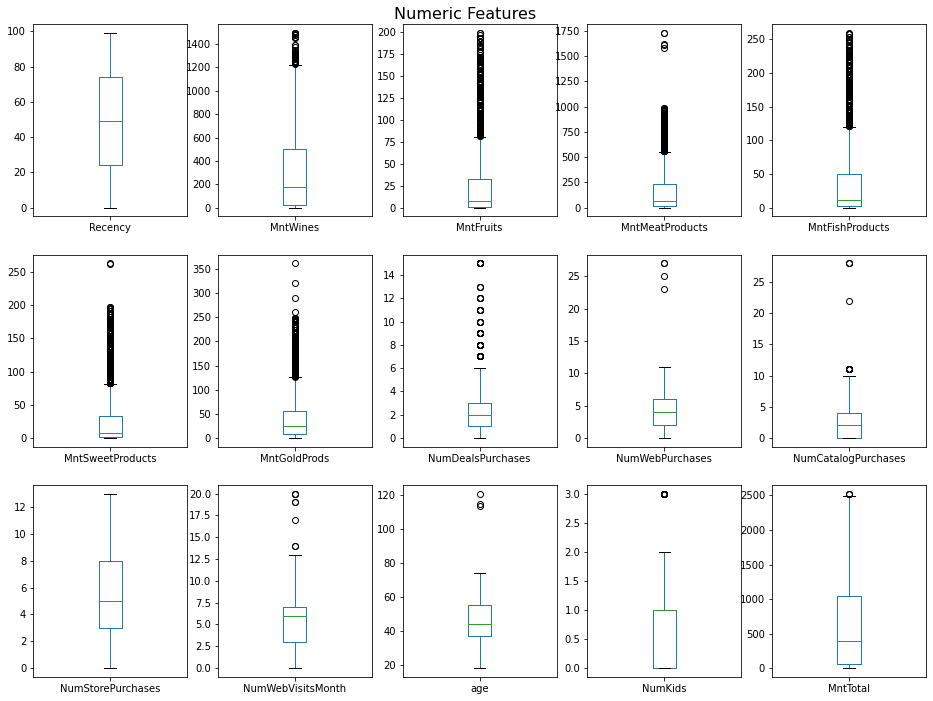

In [11]:
df['age'] = 2014 - df['Year_Birth']
df['NumKids'] = df['Kidhome']+df['Teenhome']
df['MntTotal'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']
df_ = df.drop(columns=['Year_Birth','Kidhome','Teenhome','ID', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'Complain']).select_dtypes(include=np.number)
# subplots
df_.plot(subplots=True, layout=(3,5), kind='box', figsize=(16,12))#, patch_artist=True)
plt.suptitle('Numeric Features', fontsize=16, y=0.9)
plt.savefig('numeric_boxplots.png')#, bbox_inches='tight')

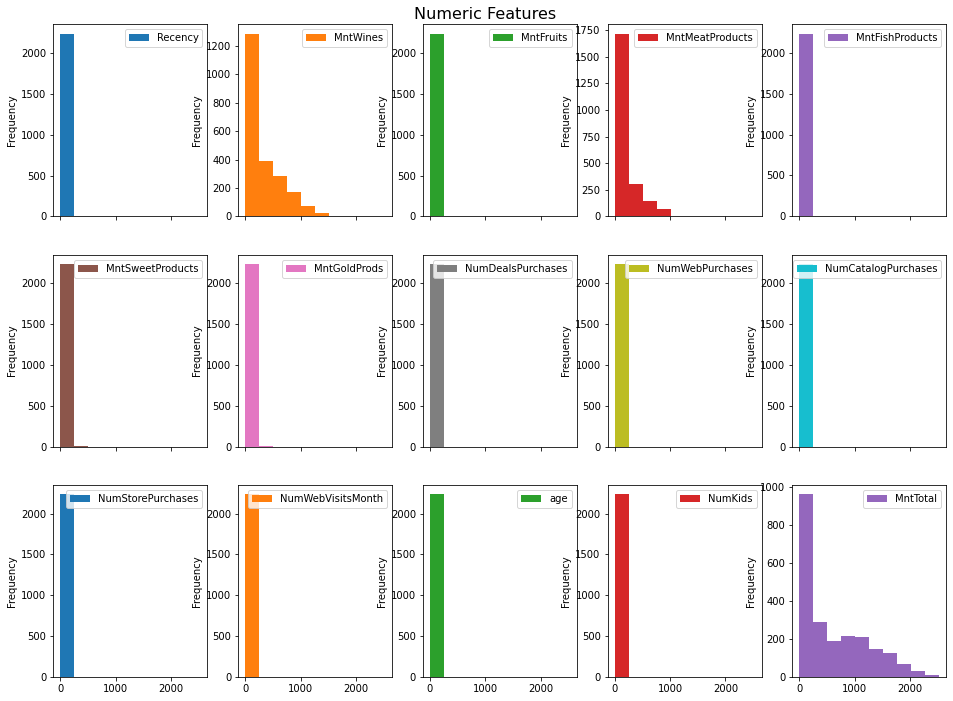

In [15]:
df['age'] = 2014 - df['Year_Birth']
df['NumKids'] = df['Kidhome']+df['Teenhome']
df['MntTotal'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']
df_ = df.drop(columns=['Year_Birth','Kidhome','Teenhome','ID', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'Complain']).select_dtypes(include=np.number)
# subplots
df_.plot(subplots=True, layout=(3,5), kind='hist', figsize=(16,12))#, patch_artist=True)
plt.suptitle('Numeric Features', fontsize=16, y=0.9)
plt.savefig('numeric_boxplots.png')#, bbox_inches='tight')

### Feature Exploration

In [12]:
#SKIPPING FOR NOW, DATES SEEM TO CREATE PROBLEMS IN RFS
df['Dt_Customer']=pd.to_datetime(df['Dt_Customer'])
##df['Year_Birth']=pd.to_datetime(df['Year_Birth'])

#Last customer joined in 2014->Probably implies that our data was gathered up to 2014
df['age'] = 2014 - df['Year_Birth']

In [13]:
df['Dt_Customer'].describe()

<ipython-input-13-fa2b982d6b68>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df['Dt_Customer'].describe()


count                    2240
unique                    663
top       2012-08-31 00:00:00
freq                       12
first     2012-07-30 00:00:00
last      2014-06-29 00:00:00
Name: Dt_Customer, dtype: object

In [14]:
df.head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,age,NumKids,MntTotal
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,2014-06-16,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP,44,0,1190
1,1,1961,Graduation,Single,"$57,091.00",0,0,2014-06-15,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA,53,0,577
2,10476,1958,Graduation,Married,"$67,267.00",0,1,2014-05-13,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US,56,1,251
3,1386,1967,Graduation,Together,"$32,474.00",1,1,2014-05-11,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS,47,2,11
4,5371,1989,Graduation,Single,"$21,474.00",1,0,2014-04-08,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP,25,1,91
5,7348,1958,PhD,Single,"$71,691.00",0,0,2014-03-17,0,336,130,411,240,32,43,1,4,7,5,2,0,0,0,0,0,1,0,SP,56,0,1192
6,4073,1954,2n Cycle,Married,"$63,564.00",0,0,2014-01-29,0,769,80,252,15,34,65,1,10,10,7,6,1,0,0,0,0,1,0,GER,60,0,1215
7,1991,1967,Graduation,Together,"$44,931.00",0,1,2014-01-18,0,78,0,11,0,0,7,1,2,1,3,5,0,0,0,0,0,0,0,SP,47,1,96
8,4047,1954,PhD,Married,"$65,324.00",0,1,2014-01-11,0,384,0,102,21,32,5,3,6,2,9,4,0,0,0,0,0,0,0,US,60,1,544
9,9477,1954,PhD,Married,"$65,324.00",0,1,2014-01-11,0,384,0,102,21,32,5,3,6,2,9,4,0,0,0,0,0,0,0,IND,60,1,544


**Missing 24/2240 Income observations. How to handle these**

#### Trying to find the campaign dates based on dates customers joined

In [204]:
group=df.groupby(['AcceptedCmp1','Dt_Customer'])

In [205]:
len(group)

776

In [206]:
for item in group:
    print(item)

((0, Timestamp('2012-07-30 00:00:00')),         ID  Year_Birth Education Marital_Status      Income   Kidhome  \
1642  6653        1970       PhD        Married  $55,158.00         1   

      Teenhome Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
1642         1  2012-07-30       72       293          0               87   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
1642                4                11            23                  4   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
1642                7                    2                  5   

      NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
1642                  7             0             0             0   

      AcceptedCmp1  AcceptedCmp2  Response  Complain Country  age  
1642             0             0         1         0      SP   44  )
((0, Timestamp('2012-07-31 00:00:00')),        ID  Year_Birth Education Marital_Status      Income

1615             0             0         0         0     IND   44  )
((0, Timestamp('2012-08-22 00:00:00')),          ID  Year_Birth   Education Marital_Status      Income   Kidhome  \
307    8707        1956  Graduation        Married  $79,456.00         0   
591   10395        1986       Basic         Single   $8,940.00         1   
801    6263        1968  Graduation       Together  $35,322.00         1   
1263   6905        1994  Graduation       Together  $80,685.00         0   
2038   7422        1987  Graduation         Single  $46,923.00         1   
2134   5885        1973    2n Cycle        Married  $35,688.00         2   
2135   3310        1973    2n Cycle        Married  $35,688.00         2   

      Teenhome Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
307          0  2012-08-22       12       565         42              548   
591          0  2012-08-22       25         1         45                3   
801          2  2012-08-22       34        28      

((0, Timestamp('2012-09-03 00:00:00')),          ID  Year_Birth   Education Marital_Status      Income   Kidhome  \
107    1631        1965         PhD       Together  $65,220.00         0   
662   10971        1977  Graduation         Single  $37,774.00         2   
1705   6856        1979  Graduation       Together  $21,645.00         1   
1983   2902        1958  Graduation       Together          NaN        1   

      Teenhome Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
107          0  2012-09-03        3       890         63              292   
662          0  2012-09-03       28       173          8              107   
1705         0  2012-09-03       75        14          0               23   
1983         1  2012-09-03       87        19          4               12   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
107                 0                25            12                  4   
662                 7                 2  

2219             0             0         0         0      CA   34  )
((0, Timestamp('2012-09-24 00:00:00')),        ID  Year_Birth Education Marital_Status      Income   Kidhome  \
283  3403        1958       PhD       Together  $78,952.00         0   
944  5207        1963       PhD        Married  $53,378.00         1   

     Teenhome Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
283         1  2012-09-24       11      1170         19              594   
944         1  2012-09-24       41       489          6              152   

     MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
283               99                76           134                  2   
944                8                 6           132                 10   

     NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
283                2                    5                 12   
944                9                    4                  6   

     NumWebVisitsMonth  Ac

2199             0             0         0         0      SA   50  )
((0, Timestamp('2012-10-23 00:00:00')),         ID  Year_Birth Education Marital_Status      Income   Kidhome  \
408    796        1965  2n Cycle       Divorced  $60,161.00         0   
2108  8970        1972       PhD        Married  $62,010.00         0   

      Teenhome Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
408          1  2012-10-23       17       584         44              212   
2108         1  2012-10-23       93       371         22               39   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
408                46                 8           177                  3   
2108                6                 0            92                  4   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
408                11                    4                  8   
2108                6                    2                  7   

      NumWebVi

((0, Timestamp('2012-11-19 00:00:00')),         ID  Year_Birth Education Marital_Status      Income   Kidhome  \
134   8996        1957       PhD        Married          NaN        2   
1258  6260        1955    Master       Together  $82,384.00         0   
1414  6250        1949       PhD          Widow  $54,356.00         0   

      Teenhome Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
134          1  2012-11-19        4       230         42              192   
1258         0  2012-11-19       55       984         51              432   
1414         1  2012-11-19       62       710         15               30   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
134                49                37            53                 12   
1258              180               120           190                  1   
1414               20                 0             0                  3   

      NumWebPurchases  NumCatalogPurchases  NumStoreP

((0, Timestamp('2012-12-09 00:00:00')),        ID  Year_Birth   Education Marital_Status      Income   Kidhome  \
636   709        1952  Graduation       Divorced  $51,537.00         0   
1566  895        1948         PhD        Married  $61,467.00         0   

      Teenhome Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
636          1  2012-12-09       27       787         20              204   
1566         2  2012-12-09       69       410         16              114   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
636                 0                 0            92                  3   
1566                0                 5            49                  3   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
636                 2                    2                 11   
1566                5                    2                 10   

      NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
636        

1547             0             0         0         0      SP   43  )
((0, Timestamp('2012-12-31 00:00:00')),         ID  Year_Birth   Education Marital_Status      Income   Kidhome  \
1583  2431        1990  Graduation        Married  $18,222.00         0   

      Teenhome Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
1583         0  2012-12-31       70        12          4               19   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
1583               12                 6            14                  1   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
1583                2                    0                  3   

      NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
1583                  8             0             0             0   

      AcceptedCmp1  AcceptedCmp2  Response  Complain Country  age  
1583             0             0         0         0      SP   24  )
((0, Timestamp('2013-01-0

((0, Timestamp('2013-01-23 00:00:00')),         ID  Year_Birth   Education Marital_Status      Income   Kidhome  \
1112  7019        1963  Graduation       Together  $54,414.00         1   
1137  6642        1961  Graduation       Divorced  $27,215.00         2   
1718   238        1967    2n Cycle       Together  $67,309.00         1   
1842  6257        1976      Master         Single  $60,482.00         0   
1887  3523        1962  Graduation       Together  $75,072.00         0   

      Teenhome Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
1112         1  2013-01-23       49       109         18               16   
1137         1  2013-01-23       50        30          5               22   
1718         1  2013-01-23       76       515         47              181   
1842         1  2013-01-23       81       255         43              134   
1887         1  2013-01-23       83       583         34              309   

      MntFishProducts  MntSweetProducts  MntGo

1789             0             0         0         0     AUS   49  )
((0, Timestamp('2013-02-14 00:00:00')),          ID  Year_Birth   Education Marital_Status      Income   Kidhome  \
43     3657        1986  Graduation         Single  $39,146.00         1   
44     5740        1970    2n Cycle       Divorced  $25,959.00         1   
129   10177        1954  Graduation       Divorced  $72,071.00         0   
130    2429        1954  Graduation       Divorced  $72,071.00         0   
404    9212        1962      Master        Married  $72,828.00         0   
633    6281        1966  Graduation       Divorced  $55,686.00         0   
716   10602        1983  Graduation        Married  $39,922.00         1   
717    3220        1983  Graduation        Married  $39,922.00         1   
718    5424        1983  Graduation        Married  $39,922.00         1   
1886   5185        1955  Graduation        Married  $74,268.00         0   
2126  10402        1967  Graduation        Married  $35

656             0             0         0         0      US   63  )
((0, Timestamp('2013-03-10 00:00:00')),         ID  Year_Birth Education Marital_Status      Income   Kidhome  \
99    4827        1956       PhD         Single  $54,998.00         0   
959    433        1958    Master          Alone  $61,331.00         1   
1005  8812        1979  2n Cycle       Divorced  $13,533.00         1   
1656  1173        1947    Master       Together  $77,632.00         0   
1809  3945        1947       PhD          Widow  $68,117.00         0   

      Teenhome Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
99           1  2013-03-10        3       154         22              202   
959          1  2013-03-10       42       534          5               47   
1005         0  2013-03-10       45        12          3                8   
1656         0  2013-03-10       73      1200        105              758   
1809         1  2013-03-10       80       618         44            

1561             0             0         0         0     AUS   41  )
((0, Timestamp('2013-03-30 00:00:00')),          ID  Year_Birth Education Marital_Status      Income   Kidhome  \
655    4656        1990  2n Cycle         Single  $51,250.00         1   
1369   6292        1986       PhD        Married  $82,333.00         0   
2056  10590        1956       PhD       Together  $76,542.00         0   

      Teenhome Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
655          0  2013-03-30       28       342         32              230   
1369         0  2013-03-30       60      1311          0              359   
2056         0  2013-03-30       91       794         73              573   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
655                34                32            40                  5   
1369               46                89            17                  1   
2056                0                29            14    

1929             0             0         0         0      SP   63  )
((0, Timestamp('2013-04-29 00:00:00')),        ID  Year_Birth   Education Marital_Status       Income   Kidhome  \
98   8601        1980  Graduation        Married   $80,011.00         0   
325  4931        1977  Graduation       Together  $157,146.00         0   
755  3491        1975  Graduation       Together   $55,914.00         0   

     Teenhome Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
98          1  2013-04-29        3       421         76              536   
325         0  2013-04-29       13         1          0             1725   
755         1  2013-04-29       32       384         60              364   

     MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
98                82               178           102                  2   
325                2                 1             1                  0   
755              119               101           232        

((0, Timestamp('2013-05-28 00:00:00')),         ID  Year_Birth   Education Marital_Status      Income   Kidhome  \
20    2285        1954      Master       Together  $36,634.00         0   
581    975        1956  Graduation         Single  $54,252.00         1   
1629  8562        1969  Graduation       Together  $54,165.00         0   
1715  6810        1983  Graduation       Divorced  $82,025.00         0   

      Teenhome Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
20           1  2013-05-28        0       213          9               76   
581          1  2013-05-28       25       178          4               26   
1629         0  2013-05-28       72       127          4               73   
1715         0  2013-05-28       76       267         98              606   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
20                  4                 3            30                  3   
581                 8                 4       

((0, Timestamp('2013-06-14 00:00:00')),          ID  Year_Birth   Education Marital_Status      Income   Kidhome  \
1255  10691        1960      Master        Married  $28,520.00         1   
1739   4037        1976  Graduation       Divorced  $31,859.00         1   
2072   1517        1969  Graduation         Single  $30,822.00         1   

      Teenhome Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
1255         1  2013-06-14       55        11          0               10   
1739         0  2013-06-14       77         3          1                3   
2072         0  2013-06-14       92         3          9               13   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
1255                0                 2            20                  1   
1739                8                 0             5                  1   
2072                2                12            12                  1   

      NumWebPurchases  NumCatalogPurchase

2210             0             0         0         0      SP   48  )
((0, Timestamp('2013-07-06 00:00:00')),         ID  Year_Birth   Education Marital_Status      Income   Kidhome  \
707   7873        1973         PhD       Together  $63,516.00         1   
914   8147        1960  Graduation        Married  $31,454.00         1   
1350  1453        1943         PhD          Widow  $57,513.00         0   
1601  6349        1987      Master       Divorced  $61,787.00         0   

      Teenhome Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
707          1  2013-07-06       30       141         11              114   
914          1  2013-07-06       40        28          0               11   
1350         0  2013-07-06       59       735         40              183   
1601         0  2013-07-06       71       621         73              414   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
707                15                14             5

((0, Timestamp('2013-07-24 00:00:00')),         ID  Year_Birth Education Marital_Status      Income   Kidhome  \
556   1378        1972  2n Cycle       Together  $50,334.00         0   
2069  1916        1954    Master        Married  $45,736.00         0   

      Teenhome Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
556          1  2013-07-24       24       284         16              160   
2069         1  2013-07-24       92       188          3              180   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
556                84                16           134                  6   
2069               20                 3            43                  5   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
556                 7                    4                  6   
2069                7                    1                  6   

      NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
556           

177             0             0         0         0      SP   41  )
((0, Timestamp('2013-08-14 00:00:00')),         ID  Year_Birth Education Marital_Status      Income   Kidhome  \
1154  5290        1964       PhD        Married  $41,551.00         1   

      Teenhome Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
1154         1  2013-08-14       51       220          0               33   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
1154                3                 0            23                  5   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
1154                5                    1                  5   

      NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
1154                  8             0             0             0   

      AcceptedCmp1  AcceptedCmp2  Response  Complain Country  age  
1154             0             0         0         0      CA   50  )
((0, Timestamp('2013-08-15 00:

1713             0             0         0         0     AUS   38  )
((0, Timestamp('2013-09-04 00:00:00')),          ID  Year_Birth Education Marital_Status      Income   Kidhome  \
297   10401        1976  2n Cycle       Together  $26,326.00         0   
1427   8442        1985    Master        Married  $19,510.00         2   

      Teenhome Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
297          0  2013-09-04       12         1          0                5   
1427         0  2013-09-04       63         9          0                7   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
297                 0                 3             9                  1   
1427                3                 4             7                  2   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
297                 0                    0                  3   
1427                1                    0                  3   

      NumWe

((0, Timestamp('2013-10-01 00:00:00')),         ID  Year_Birth   Education Marital_Status      Income   Kidhome  \
1072  7250        1978  Graduation       Together  $57,867.00         1   
1202  4994        1943      Master         Single  $77,598.00         0   
2008  4554        1965  Graduation       Together  $47,009.00         0   

      Teenhome Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
1072         0  2013-10-01       48       344         35              178   
1202         0  2013-10-01       53      1193         33              281   
2008         1  2013-10-01       89       171         45               73   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
1072               15                23            17                  7   
1202              129                66            33                  1   
2008               59                10            90                  4   

      NumWebPurchases  NumCatalogPurchases  N

1180             0             0         0         0      SA   29  )
((0, Timestamp('2013-10-28 00:00:00')),         ID  Year_Birth   Education Marital_Status      Income   Kidhome  \
318   7600        1992       Basic         Single  $15,253.00         1   
319   6406        1988      Master        Married  $78,285.00         0   
648   2826        1967  Graduation        Married  $22,574.00         2   
649   6222        1967  Graduation        Married  $22,574.00         2   
866   9185        1966         PhD         Single  $69,759.00         0   
939   8135        1986      Master        Married  $27,161.00         1   
1537  5286        1987      Master         Single  $41,020.00         0   
2206   313        1968  Graduation          Widow  $73,455.00         0   

      Teenhome Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
318          0  2013-10-28       13         1          3                3   
319          0  2013-10-28       13       647        107     

2168             0             0         0         0     AUS   66  )
((0, Timestamp('2013-11-22 00:00:00')),         ID  Year_Birth Education Marital_Status      Income   Kidhome  \
1471  4887        1976       PhD       Divorced  $55,412.00         1   
2166  1966        1965       PhD        Married  $84,618.00         0   
2167  7789        1965       PhD        Married  $84,618.00         0   

      Teenhome Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
1471         1  2013-11-22       65        10          5               28   
2166         0  2013-11-22       96       684        100              801   
2167         0  2013-11-22       96       684        100              801   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
1471               11                 1             8                  1   
2166               21                66             0                  1   
2167               21                66             0        

((0, Timestamp('2013-12-11 00:00:00')),         ID  Year_Birth   Education Marital_Status      Income   Kidhome  \
418   1064        1971         PhD        Married  $42,403.00         1   
786   8086        1959  Graduation        Married  $42,243.00         1   
1199  9952        1947      Master       Together  $78,093.00         0   
1942  2005        1990  Graduation        Married  $35,765.00         1   

      Teenhome Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
418          0  2013-12-11       18        22          1               11   
786          1  2013-12-11       34        48          0                2   
1199         0  2013-12-11       53       368         32              639   
1942         0  2013-12-11       86        22          3               30   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
418                 0                 5             3                  1   
786                 0                 0       

((0, Timestamp('2013-12-30 00:00:00')),         ID  Year_Birth   Education Marital_Status      Income   Kidhome  \
596   1542        1975  Graduation         Single  $56,243.00         1   
1198  3139        1982    2n Cycle         Single  $74,116.00         0   
1359  5300        1973      Master        Married  $38,961.00         1   

      Teenhome Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
596          2  2013-12-30       26       347          0               35   
1198         0  2013-12-30       53       871        111              704   
1359         0  2013-12-30       60        19          7               19   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
596                 4                 3             7                  6   
1198              145                55           166                  1   
1359                0                 1            24                  1   

      NumWebPurchases  NumCatalogPurchases  N

1124             0             0         0         0      SP   54  )
((0, Timestamp('2014-02-01 00:00:00')),         ID  Year_Birth   Education Marital_Status      Income   Kidhome  \
1534  8749        1984  Graduation       Together  $37,235.00         1   

      Teenhome Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
1534         0  2014-02-01       68        20          2                9   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
1534                4                 6            20                  1   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
1534                1                    1                  2   

      NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
1534                  4             0             0             0   

      AcceptedCmp1  AcceptedCmp2  Response  Complain Country  age  
1534             0             0         0         0      SP   30  )
((0, Timestamp('2014-02-0

2091             0             0         0         1      SP   36  )
((0, Timestamp('2014-03-05 00:00:00')),         ID  Year_Birth   Education Marital_Status      Income   Kidhome  \
339   9362        1965  Graduation         Single  $69,263.00         0   
1920  6963        1947  Graduation         Single  $77,457.00         0   
1938  4676        1951      Master          Widow  $73,705.00         0   

      Teenhome Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
339          1  2014-03-05       14       492          5               32   
1920         0  2014-03-05       85       675         11              400   
1938         2  2014-03-05       86       612         91              520   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
339                13                 5            21                  1   
1920               15                45            11                  1   
1938              258               107           107

1729             0             0         0         0     IND   47  )
((0, Timestamp('2014-04-05 00:00:00')),          ID  Year_Birth   Education Marital_Status      Income   Kidhome  \
289    1446        1956      Master         Single  $86,424.00         0   
503    8737        1978  Graduation       Divorced  $55,563.00         0   
1216   1131        1967         PhD         Single  $52,569.00         0   
1217    202        1948         PhD          Widow  $82,032.00         0   
1218   9589        1948         PhD          Widow  $82,032.00         0   
1620   5545        1972         PhD        Married  $78,075.00         0   
1935   3194        1974         PhD         Single  $71,466.00         0   
2161  10500        1984  Graduation        Married  $31,761.00         1   

      Teenhome Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
289          0  2014-04-05       12       387         68              569   
503          1  2014-04-05       22        29       

((0, Timestamp('2014-04-24 00:00:00')),         ID  Year_Birth   Education Marital_Status      Income   Kidhome  \
764   6887        1967  Graduation         Single  $79,146.00         1   
765   7500        1967  Graduation         Single  $79,146.00         1   
1342  3830        1953      Master        Married  $59,354.00         0   
2111  1010        1977  Graduation       Together  $46,931.00         2   
2184    48        1964  Graduation       Together  $55,761.00         0   

      Teenhome Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
764          1  2014-04-24       33       245         16              223   
765          1  2014-04-24       33       245         16              223   
1342         2  2014-04-24       59       295         21               78   
2111         1  2014-04-24       94        41          0               17   
2184         1  2014-04-24       97       136          1               12   

      MntFishProducts  MntSweetProducts  MntGo

1530             0             0         0         0     GER   61  )
((0, Timestamp('2014-05-17 00:00:00')),         ID  Year_Birth   Education Marital_Status      Income   Kidhome  \
110    254        1955  Graduation       Together  $53,863.00         0   
513  11004        1893    2n Cycle         Single  $60,182.00         0   

     Teenhome Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
110         1  2014-05-17        4       399          4               30   
513         1  2014-05-17       23         8          0                5   

     MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
110                6                 4            30                  3   
513                7                 0             2                  1   

     NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
110                7                    1                  7   
513                1                    0                  2   

     NumWebVisits

1915             0             0         0         0      SA   44  )
((0, Timestamp('2014-06-18 00:00:00')),          ID  Year_Birth   Education Marital_Status      Income   Kidhome  \
285    4828        1954  Graduation       Divorced  $79,865.00         0   
966   10403        1978  Graduation       Together  $16,531.00         1   
1172   4769        1977      Master       Together  $57,954.00         1   

      Teenhome Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
285          1  2014-06-18       12        71         99              278   
966          0  2014-06-18       43         2         13                6   
1172         1  2014-06-18       52       456          4               24   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
285               185               121            38                  1   
966                 7                 5            11                  3   
1172                0                 0          

1340             1             0         1         0      CA   57  )
((1, Timestamp('2012-11-12 00:00:00')),         ID  Year_Birth   Education Marital_Status      Income   Kidhome  \
2019  2975        1976  Graduation       Together  $85,606.00         0   

      Teenhome Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
2019         1  2012-11-12       89       717         42              864   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
2019              219                30            84                  2   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
2019                6                    7                  9   

      NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
2019                  3             0             0             0   

      AcceptedCmp1  AcceptedCmp2  Response  Complain Country  age  
2019             1             0         0         0      SP   38  )
((1, Timestamp('2012-11-2

2125             1             1         1         0      CA   24  )
((1, Timestamp('2013-03-28 00:00:00')),         ID  Year_Birth Education Marital_Status      Income   Kidhome  \
992   9274        1961    Master        Married  $80,950.00         0   
2057  6565        1949    Master        Married  $76,995.00         0   

      Teenhome Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
992          0  2013-03-28       44       525        147              112   
2057         1  2013-03-28       91      1012         80              498   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
992               219               147            63                  1   
2057                0                16           176                  2   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
992                 6                    7                  9   
2057               11                    4                  9   

      NumWebVi

1760             1             0         1         0      SP   39  )
((1, Timestamp('2013-10-09 00:00:00')),         ID  Year_Birth   Education Marital_Status      Income   Kidhome  \
35    7962        1987         PhD         Single  $95,169.00         0   
505  10430        1973  Graduation       Divorced  $89,694.00         1   

     Teenhome Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
35          0  2013-10-09        1      1285         21              449   
505         1  2013-10-09       22      1126         28              211   

     MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
35               106                20            20                  1   
505               37                28            42                  3   

     NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
35                 4                    3                  4   
505                4                    3                  4   

     NumWebVisits

33             0         1         0     IND   40  )
((1, Timestamp('2014-03-19 00:00:00')),        ID  Year_Birth Education Marital_Status      Income   Kidhome  \
435  9369        1979  2n Cycle         Single  $88,194.00         0   

     Teenhome Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
435         1  2014-03-19       19       688         14              309   

     MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
435              201                24            38                  1   

     NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
435               11                   10                 10   

     NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
435                  5             1             0             0   

     AcceptedCmp1  AcceptedCmp2  Response  Complain Country  age  
435             1             0         1         0     GER   35  )
((1, Timestamp('2014-03-21 00:00:00')),        ID  Year_B

In [78]:
group.agg(['count', 'sum', 'min', 'max', 'mean', 'std'])

ID                                           \
                         count    sum   min    max    mean          std   
AcceptedCmp1 Dt_Customer                                                  
0            2012-07-30      1   6653  6653   6653  6653.0          NaN   
             2012-07-31      1   6181  6181   6181  6181.0          NaN   
             2012-08-01      4  24422  2611  10001  6105.5  3183.791712   
             2012-08-02      3  21477  5117   8370  7159.0  1778.601417   
             2012-08-03      5  29356  2223   9847  5871.2  3433.182955   
...                        ...    ...   ...    ...     ...          ...   
1            2014-06-07      1   2225  2225   2225  2225.0          NaN   
             2014-06-10      2   9530  4001   5529  4765.0  1080.459162   
             2014-06-17      1    477   477    477   477.0          NaN   
             2014-06-23      1   2781  2781   2781  2781.0          NaN   
             2014-06-28      1   8093  8093   8093  8093.0          NaN   

                         Year_Birth                                        \
                              count   sum   min   max     mean        std   
AcceptedCmp1 Dt_Customer                                                    
0            2012-07-30           1  1970  1970  1970  1970.00        NaN   
             2012-07-31           1  1950  1950  1950  1950.00        NaN   
             2012-08-01           4  7877  1957  1985  1969.25  13.524669   
             2012-08-02           3  5886  1947  1976  1962.00  14.525839   
             2012-08-03           5  9786  1955  1965  1957.20   4.381780   
...                             ...   ...   ...   ...      ...        ...   
1            2014-06-07           1  1977  1977  1977  1977.00        NaN   
             2014-06-10           2  3892  1946  1946  1946.00   0.000000   
             2014-06-17           1  1986  1986  1986  1986.00        NaN   
             2014-06-23           1  1981  1981  1981  1981.00        NaN   
             2014-06-28           1  1969  1969  1969  1969.00        NaN   

                         Kidhome                           Teenhome          \
                           count sum min max mean      std    count sum min   
AcceptedCmp1 Dt_Customer                                                      
0            2012-07-30        1   1   1   1  1.0      NaN        1   1   1   
             2012-07-31        1   0   0   0  0.0      NaN        1   0   0   
             2012-08-01        4   2   0   1  0.5  0.57735        4   1   0   
             2012-08-02        3   0   0   0  0.0  0.00000        3   1   0   
             2012-08-03        5   0   0   0  0.0  0.00000        5   5   1   
...                          ...  ..  ..  ..  ...      ...      ...  ..  ..   
1            2014-06-07        1   0   0   0  0.0      NaN        1   0   0   
             2014-06-10        2   4   2   2  2.0  0.00000        2   2   1   
             2014-06-17        1   0   0   0  0.0      NaN        1   0   0   
             2014-06-23        1   0   0   0  0.0      NaN        1   0   0   
             2014-06-28        1   0   0   0  0.0      NaN        1   0   0   

                                                Recency  ... AcceptedCmp5  \
                         max      mean      std   count  ...          std   
AcceptedCmp1 Dt_Customer                                 ...                
0            2012-07-30    1  1.000000      NaN       1  ...          NaN   
             2012-07-31    0  0.000000      NaN       1  ...          NaN   
             2012-08-01    1  0.250000  0.50000       4  ...          0.5   
             2012-08-02    1  0.333333  0.57735       3  ...          0.0   
             2012-08-03    1  1.000000  0.00000       5  ...          0.0   
...                       ..       ...      ...     ...  ...          ...   
1            2014-06-07    0  0.000000      NaN       1  ...          NaN   
             2014-06-

In [84]:
group1=df.groupby(['AcceptedCmp1'])
group1.agg({'Dt_Customer':['count', 'min', 'max']})

Dt_Customer                      
                   count        min        max
AcceptedCmp1                                  
0                   2096 2012-07-30 2014-06-29
1                    144 2012-08-18 2014-06-28

In [85]:
group2=df.groupby(['AcceptedCmp2'])
group2.agg({'Dt_Customer':['count', 'min', 'max']})

Dt_Customer                      
                   count        min        max
AcceptedCmp2                                  
0                   2210 2012-07-30 2014-06-29
1                     30 2012-08-18 2014-06-17

In [86]:
group3=df.groupby(['AcceptedCmp3'])
group3.agg({'Dt_Customer':['count', 'min', 'max']})

Dt_Customer                      
                   count        min        max
AcceptedCmp3                                  
0                   2077 2012-07-30 2014-06-29
1                    163 2012-08-01 2014-06-26

In [88]:
group4=df.groupby(['AcceptedCmp4'])
group4.agg({'Dt_Customer':['count', 'min', 'max']})

Dt_Customer                      
                   count        min        max
AcceptedCmp4                                  
0                   2073 2012-07-30 2014-06-29
1                    167 2012-08-04 2014-06-29

In [89]:
group5=df.groupby(['AcceptedCmp5'])
group5.agg({'Dt_Customer':['count', 'min', 'max']})

Dt_Customer                      
                   count        min        max
AcceptedCmp5                                  
0                   2077 2012-07-30 2014-06-29
1                    163 2012-08-01 2014-06-23

In [94]:
groupR=df.groupby(['Response','Dt_Customer'])
groupR.agg({'Dt_Customer':['count', 'min', 'max']})#.sort_values('Dt_Customer')

Dt_Customer                      
                           count        min        max
Response Dt_Customer                                  
0        2012-07-31            1 2012-07-31 2012-07-31
         2012-08-01            2 2012-08-01 2012-08-01
         2012-08-02            3 2012-08-02 2012-08-02
         2012-08-03            4 2012-08-03 2012-08-03
         2012-08-04            3 2012-08-04 2012-08-04
...                          ...        ...        ...
1        2014-06-07            1 2014-06-07 2014-06-07
         2014-06-15            1 2014-06-15 2014-06-15
         2014-06-16            1 2014-06-16 2014-06-16
         2014-06-17            1 2014-06-17 2014-06-17
         2014-06-23            1 2014-06-23 2014-06-23

[886 rows x 3 columns]

In [95]:
groupR=df.groupby(['Response'])
groupR.agg({'Dt_Customer':['count', 'min', 'max']})#.sort_values('Dt_Customer')

Dt_Customer                      
               count        min        max
Response                                  
0               1906 2012-07-31 2014-06-29
1                334 2012-07-30 2014-06-23

In [96]:
groupR=df.groupby(['Response'])
groupR.agg({'Dt_Customer':['count', 'min', 'max']}).sort_values('Dt_Customer')

ValueError: The column label 'Dt_Customer' is not unique.
For a multi-index, the label must be a tuple with elements corresponding to each level.

In [18]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', ' Income ',
       'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country', 'age'],
      dtype='object')

In [207]:
df['Income']=df[' Income ']

df['Income']=df.Income.str.replace('$','')

df['Income']=df.Income.str.replace(',','')#.astype("Int64")

df['Income']=df.Income.astype("float")
df = df.drop([' Income '], axis=1)

In [208]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country', 'age', 'Income'],
      dtype='object')

In [209]:
type(df['Income'][1])

numpy.float64

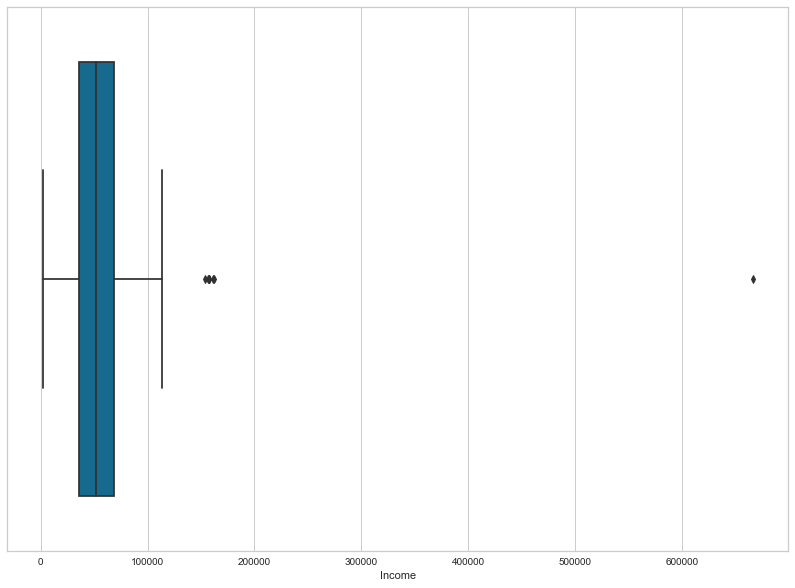

In [210]:
plt.figure(figsize=(14,10))

ax=sns.boxplot(x = 'Income', data = df)

/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Income', ylabel='Density'>

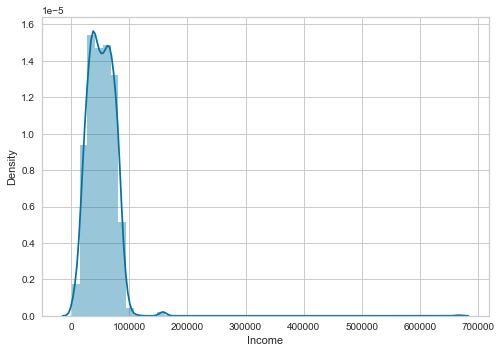

In [211]:
sns.distplot(df['Income'])


In [212]:
df[df.Income.isnull()]

,ID,Year_Birth,Education,Marital_Status,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,age,Income
134,8996,1957,PhD,Married,2,1,2012-11-19,4,230,42,192,49,37,53,12,7,2,8,9,0,0,0,0,0,0,0,GER,57,NaN
262,1994,1983,Graduation,Married,1,0,2013-11-15,11,5,5,6,0,2,1,1,1,0,2,7,0,0,0,0,0,0,0,US,31,NaN
394,3769,1972,PhD,Together,1,0,2014-03-02,17,25,1,13,0,0,3,1,1,0,3,7,0,0,0,0,0,0,0,AUS,42,NaN
449,5255,1986,Graduation,Single,1,0,2013-02-20,19,5,1,3,3,263,362,0,27,0,0,1,0,0,0,0,0,0,0,AUS,28,NaN
525,8268,1961,PhD,Married,0,1,2013-07-11,23,352,0,27,10,0,15,3,6,1,7,6,0,0,0,0,0,0,0,CA,53,NaN
590,10629,1973,2n Cycle,Married,1,0,2012-09-14,25,25,3,43,17,4,17,3,3,0,3,8,0,0,0,0,0,0,0,GER,41,NaN
899,10475,1970,Master,Together,0,1,2013-04-01,39,187,5,65,26,20,14,2,4,2,6,5,0,0,0,0,0,0,0,US,44,NaN
997,9235,1957,Graduation,Single,1,1,2014-05-27,45,7,0,8,2,0,1,1,1,0,2,7,0,0,0,0,0,0,0,GER,57,NaN
1096,4345,1964,2n Cycle,Single,1,1,2014-01-12,49,5,1,9,2,0,4,1,1,0,2,7,0,0,0,0,0,0,0,AUS,50,NaN
1185,7187,1969,Master,Together,1,1,2013-05-18,52,375,42,48,94,66,96,7,4,10,4,3,0,0,0,0,0,0,0,AUS,45,NaN


**For now, fill the missing values with the median income.  It's only one percent of the obsrevations, but might
be worth trying a different solution later. For example, flag these missing values, find median income by education, then fill in with that.  Jeremy finds that median often works well enough, but may try this for experience.  Also read PSI's Kaggle blog on extracting lots of information from just one feature for the Titanic. **

In [213]:
df['Income'].fillna((df['Income'].median()), inplace=True)

In [214]:
df[df.Income.isnull()]

,ID,Year_Birth,Education,Marital_Status,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,age,Income


In [215]:
df['LogIncome'] = np.log1p(df['Income'])

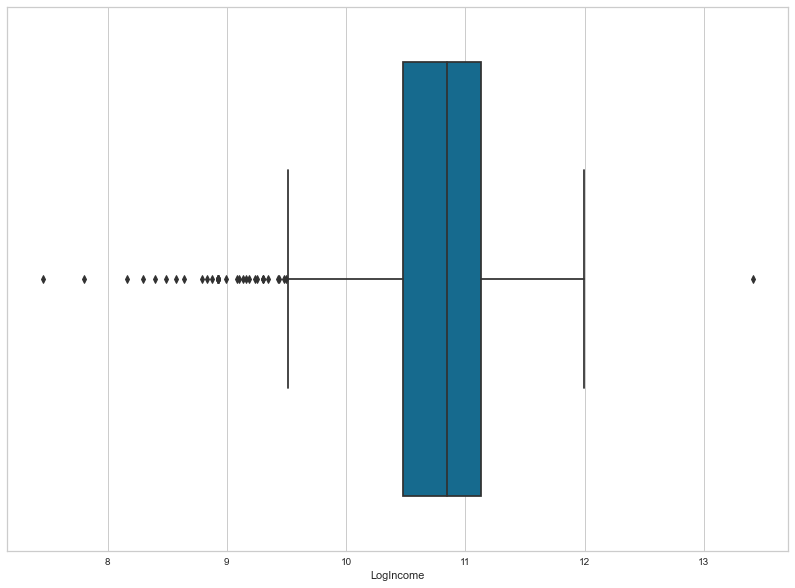

In [216]:
plt.figure(figsize=(14,10))

ax=sns.boxplot(x = 'LogIncome', data = df)

In [217]:
df.Education.value_counts()

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

In [218]:
df.groupby(['Education','Country'])['Education'].value_counts()

Education   Country  Education 
2n Cycle    AUS      2n Cycle        9
            CA       2n Cycle       24
            GER      2n Cycle       20
            IND      2n Cycle       21
            SA       2n Cycle       25
            SP       2n Cycle       97
            US       2n Cycle        7
Basic       AUS      Basic           4
            CA       Basic           7
            GER      Basic           2
            IND      Basic           4
            SA       Basic           6
            SP       Basic          28
            US       Basic           3
Graduation  AUS      Graduation     85
            CA       Graduation    133
            GER      Graduation     59
            IND      Graduation     76
            ME       Graduation      1
            SA       Graduation    161
            SP       Graduation    548
            US       Graduation     64
Master      AUS      Master         32
            CA       Master         49
            GER      Master     

- Following https://www.kaggle.com/datasets/jackdaoud/marketing-data/discussion/208329, 
2nd cycle is Master's and Graduation is Bachelor's

In [219]:
df['Education'].unique()

array(['Graduation', 'PhD', '2n Cycle', 'Master', 'Basic'], dtype=object)

In [220]:
df.Education

0       Graduation
1       Graduation
2       Graduation
3       Graduation
4       Graduation
           ...    
2235           PhD
2236      2n Cycle
2237    Graduation
2238    Graduation
2239           PhD
Name: Education, Length: 2240, dtype: object

In [221]:
df.loc[df['Education']=='2n Cycle','Education']='Master'

df.loc[df['Education']=='Graduation','Education']='Bachelor'

In [223]:
df.groupby(['Country','Education']).Education.value_counts()

Country  Education  Education
AUS      Bachelor   Bachelor      85
         Basic      Basic          4
         Master     Master        41
         PhD        PhD           30
CA       Bachelor   Bachelor     133
         Basic      Basic          7
         Master     Master        73
         PhD        PhD           55
GER      Bachelor   Bachelor      59
         Basic      Basic          2
         Master     Master        40
         PhD        PhD           19
IND      Bachelor   Bachelor      76
         Basic      Basic          4
         Master     Master        42
         PhD        PhD           26
ME       Bachelor   Bachelor       1
         Master     Master         1
         PhD        PhD            1
SA       Bachelor   Bachelor     161
         Basic      Basic          6
         Master     Master        85
         PhD        PhD           85
SP       Bachelor   Bachelor     548
         Basic      Basic         28
         Master     Master       268
        

In [224]:
df.Education.value_counts()

Bachelor    1127
Master       573
PhD          486
Basic         54
Name: Education, dtype: int64

<AxesSubplot:>

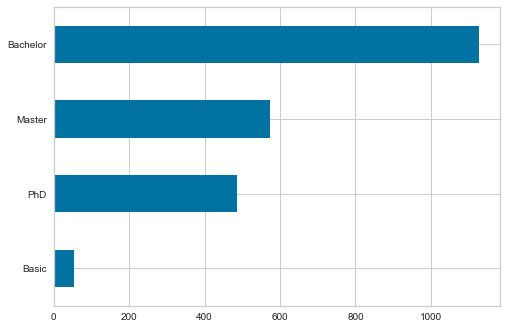

In [225]:
df.Education.value_counts().sort_values().plot(kind = 'barh')

<AxesSubplot:>

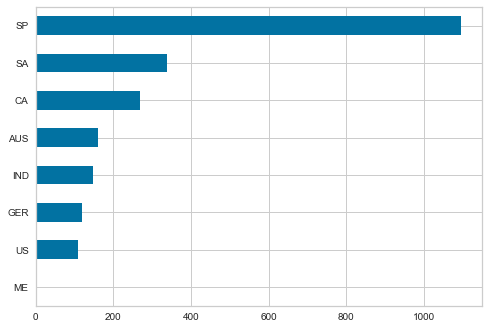

In [226]:
df.Country.value_counts().sort_values().plot(kind = 'barh')

#### Make summary features for num of children and whether a customer has children

In [227]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country', 'age', 'Income',
       'LogIncome'],
      dtype='object')

In [228]:
df['Kidhome'].value_counts()

0    1293
1     899
2      48
Name: Kidhome, dtype: int64

In [229]:
df['Teenhome'].value_counts()

0    1158
1    1030
2      52
Name: Teenhome, dtype: int64

In [230]:
df['NumChildren']  = df['Kidhome']+df['Teenhome']
df['HasChildren']=np.where(df.NumChildren> 0, 1, 0)
df['HasChildren'].value_counts()

#### Make summary features based on marital status

In [232]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country', 'age', 'Income',
       'LogIncome', 'NumChildren', 'HasChildren'],
      dtype='object')

In [233]:
df['Marital_Status'].value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [235]:
df['Solitary']=np.where(((df.Marital_Status== 'Married')|(df.Marital_Status== 'Together')), 0, 1)
df['Solitary'].value_counts()

0    1444
1     796
Name: Solitary, dtype: int64

In [239]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country', 'age', 'Income',
       'LogIncome', 'NumChildren', 'HasChildren', 'Solitary'],
      dtype='object')

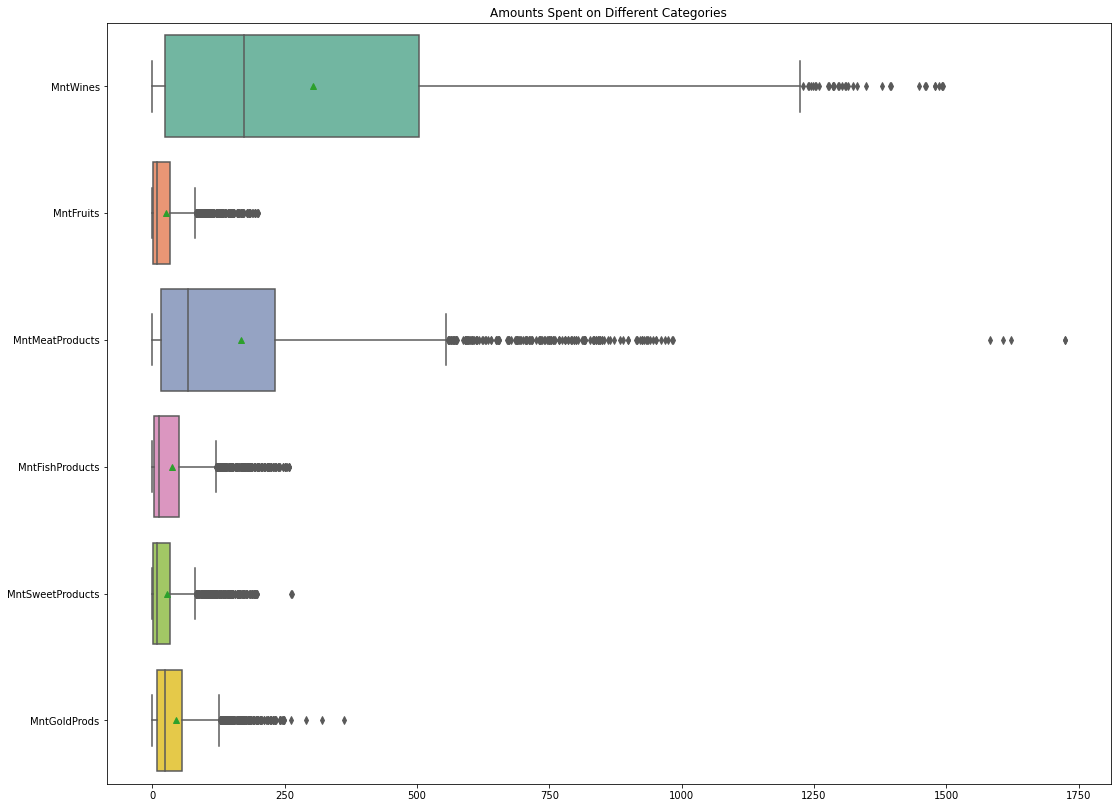

In [10]:
plt.figure(figsize=(18,14))
#for feature in ['MntTotal','MntWines']:
ax = sns.boxplot(data=df[['MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds']], orient="h", palette="Set2",
                showmeans=True)
plt.title("Amounts Spent on Different Categories") 
plt.savefig('amounts_spent.png')

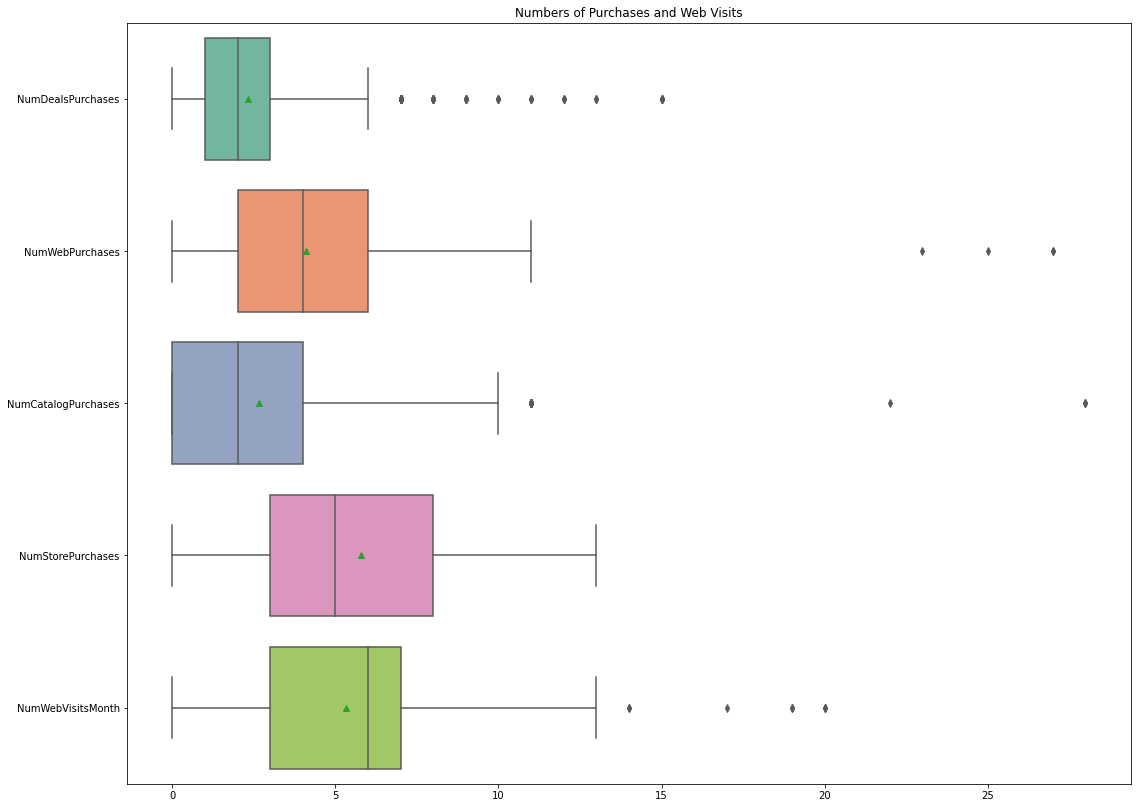

In [11]:
plt.figure(figsize=(18,14))
#for feature in ['MntTotal','MntWines']:
ax = sns.boxplot(data=df[['NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']], orient="h", palette="Set2",showmeans=True)
plt.title("Numbers of Purchases and Web Visits") 
plt.savefig('num_deals.png')

<AxesSubplot:>

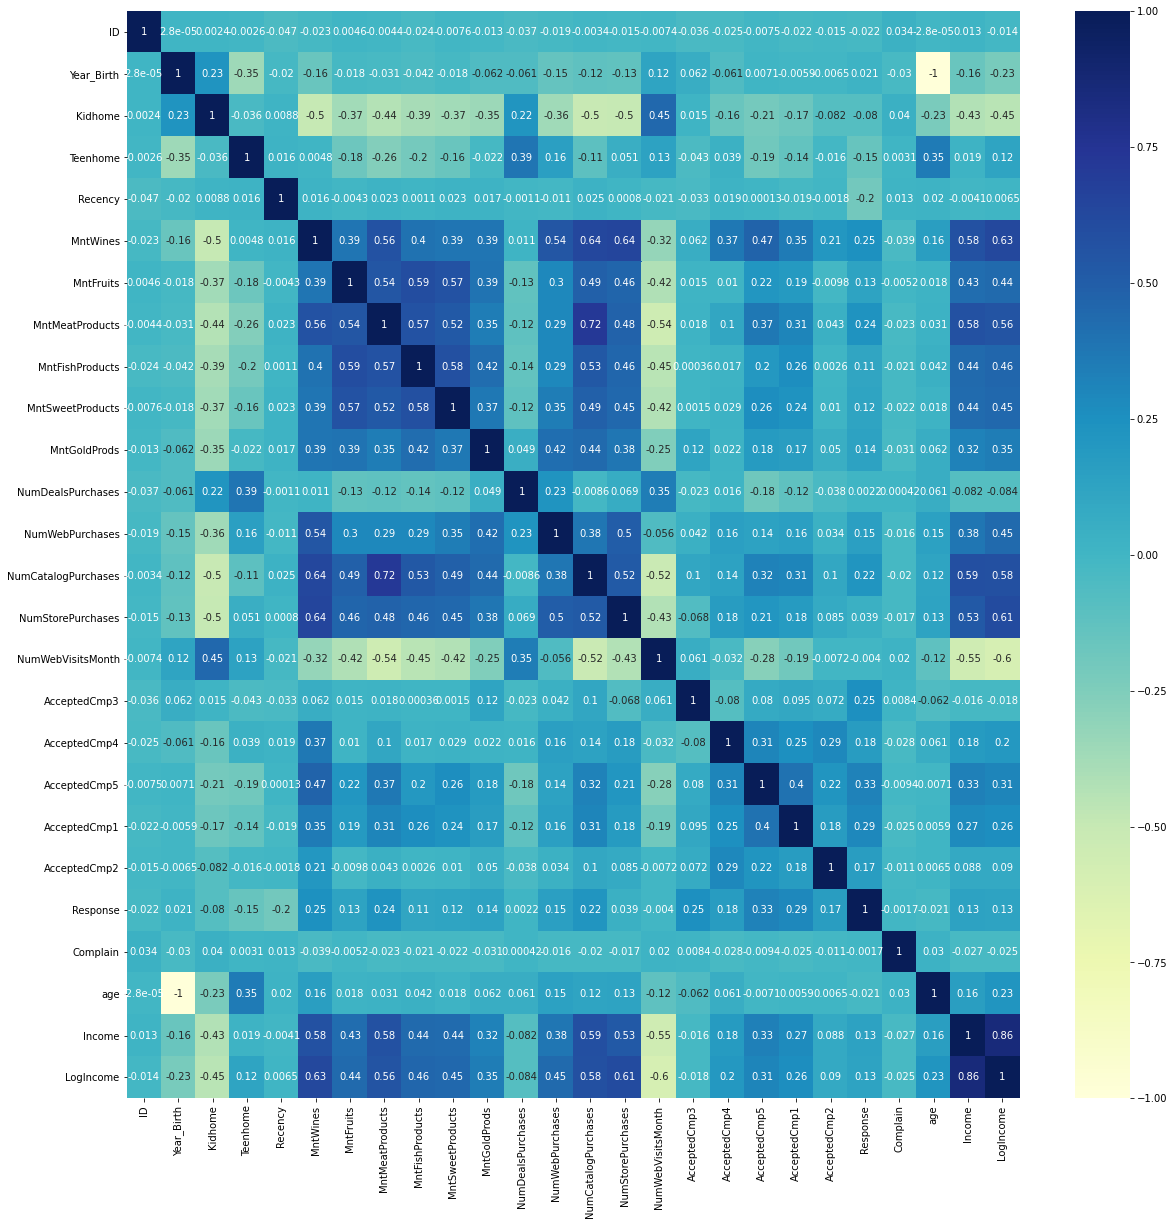

In [41]:
corrs= df.corr()
plt.figure(figsize=(20,20))  
sns.heatmap(corrs,annot=True, cmap="YlGnBu", center=0)

#### Response (accepting last campaign) is most highly correlated with accepting the last campaign (not surprising), followed by camapaign 1, then amount spent on wine/campaign 3, then amount spent on meats

#### Seems that customers that accept other campaigns + spend more on wine and meat are the likeliest to respond to the last campaign.  Who are these customers?

In [132]:
#Add a column to model total amounts
df['MntTotal'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

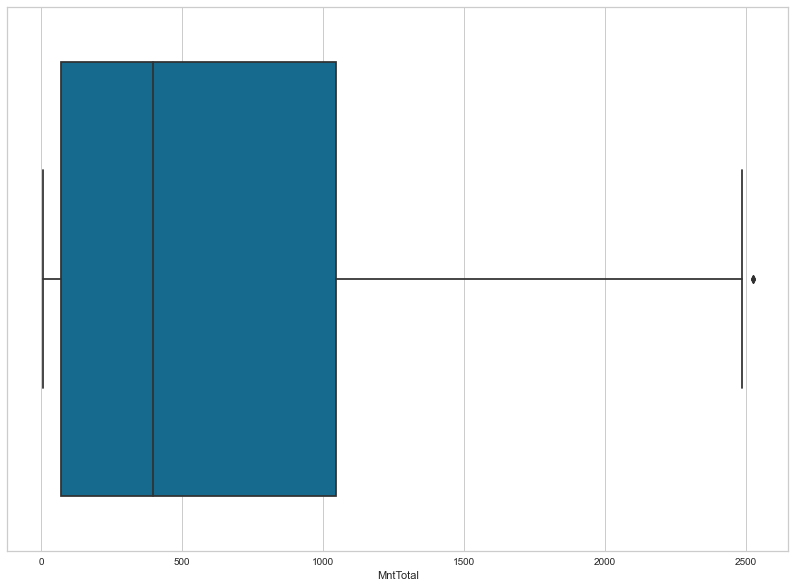

In [133]:
plt.figure(figsize=(14,10))

ax=sns.boxplot(x = 'MntTotal', data = df)

In [134]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', ' Income ',
       'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country', 'age',
       'AcceptedCmpTot', 'Len_Customer', 'MntTotal'],
      dtype='object')

In [135]:
#Add a column to model total number of purchases
df['NumTotalPurchases'] = df['NumDealsPurchases'] + df['NumWebPurchases']+df['NumCatalogPurchases']+\
    df['NumStorePurchases']+df['NumWebVisitsMonth']


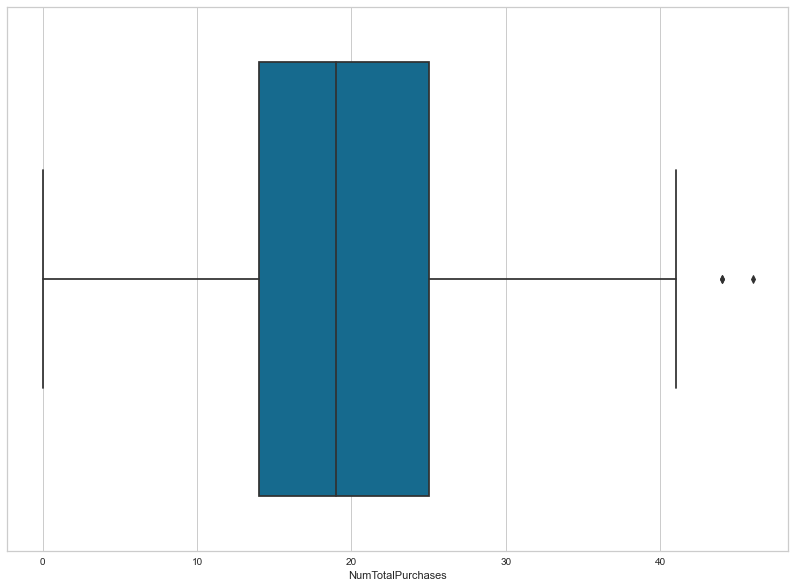

In [136]:
plt.figure(figsize=(14,10))

ax=sns.boxplot(x = 'NumTotalPurchases', data = df)

In [137]:
df['AcceptedCmpTot']=df['AcceptedCmp1']+ df['AcceptedCmp2']+ df['AcceptedCmp3']+ df['AcceptedCmp4']+\
       + df['AcceptedCmp5'] #+ df['Response']
# df=df.drop(['AcceptedCmp1_5'], axis=1)
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,age,AcceptedCmpTot,Len_Customer,MntTotal,NumTotalPurchases
0,1826,1970,2,2,"$84,835.00",0,0,2014-06-16,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP,44,0,110 days,1190,16
1,1,1961,2,4,"$57,091.00",0,0,2014-06-15,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA,53,1,111 days,577,23
2,10476,1958,2,3,"$67,267.00",0,1,2014-05-13,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US,56,0,144 days,251,13
3,1386,1967,2,5,"$32,474.00",1,1,2014-05-11,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS,47,0,146 days,11,11
4,5371,1989,2,4,"$21,474.00",1,0,2014-04-08,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP,25,1,179 days,91,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,4,2,"$66,476.00",0,1,2013-03-07,99,372,18,126,47,48,78,2,5,2,11,4,0,0,0,0,0,0,0,US,38,0,576 days,689,24
2236,5263,1977,0,3,"$31,056.00",1,0,2013-01-22,99,5,10,13,3,8,16,1,1,0,3,8,0,0,0,0,0,0,0,SP,37,0,620 days,55,13
2237,22,1976,2,2,"$46,310.00",1,0,2012-12-03,99,185,2,88,15,5,14,2,6,1,5,8,0,0,0,0,0,0,0,SP,38,0,670 days,309,22
2238,528,1978,2,3,"$65,819.00",0,0,2012-11-29,99,267,38,701,149,165,63,1,5,4,10,3,0,0,0,0,0,0,0,IND,36,0,674 days,1383,23


Text(0.5, 1.0, 'Marketing Campaign Acceptance Rates')

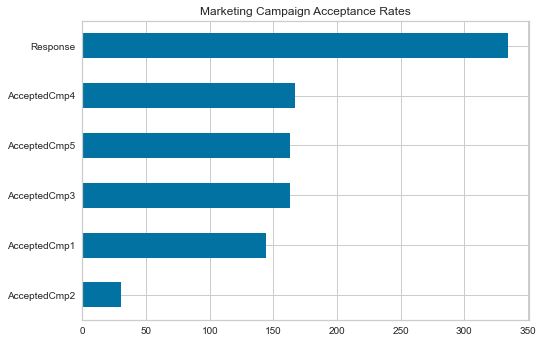

In [138]:
#df[["AcceptedCmp1", "AcceptedCmp2","AcceptedCmp3","AcceptedCmp4","AcceptedCmp5","AcceptedCmp1_5","Response","NumDealsPurchases"]].sum().sort_values().plot.barh()
df[["AcceptedCmp1", "AcceptedCmp2","AcceptedCmp3","AcceptedCmp4","AcceptedCmp5","Response"]].sum().sort_values().plot.barh()

plt.title("Marketing Campaign Acceptance Rates") # Get rates!  Are these offerred to all 2240 customers?

<AxesSubplot:xlabel='Dt_Customer', ylabel='Count'>

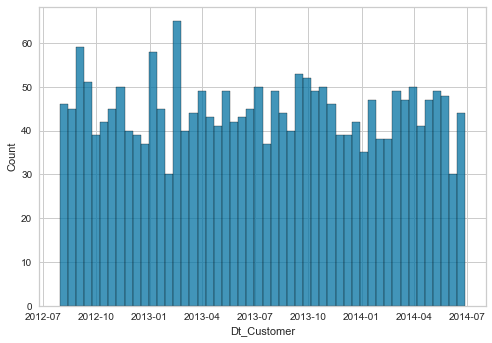

In [102]:
sns.histplot(data=df.Dt_Customer, bins=50)

In [248]:
df_ =df.set_index(['Dt_Customer'])

In [249]:
df_.head()

,ID,Year_Birth,Education,Marital_Status,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,age,Income,LogIncome,NumChildren,HasChildren,Solitary
Dt_Customer,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2014-06-16,1826,1970,Bachelor,Divorced,0,0,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP,44,84835.0,11.348475,0,0,1
2014-06-15,1,1961,Bachelor,Single,0,0,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA,53,57091.0,10.952419,0,0,1
2014-05-13,10476,1958,Bachelor,Married,0,1,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US,56,67267.0,11.116440,1,1,0
2014-05-11,1386,1967,Bachelor,Together,1,1,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS,47,32474.0,10.388226,2,1,0
2014-04-08,5371,1989,Bachelor,Single,1,0,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP,25,21474.0,9.974645,1,1,1


In [250]:
df_.loc['2014-05-16' : '2014-06-29' ]

,ID,Year_Birth,Education,Marital_Status,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,age,Income,LogIncome,NumChildren,HasChildren,Solitary
Dt_Customer,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2014-06-16,1826,1970,Bachelor,Divorced,0,0,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP,44,84835.0,11.348475,0,0,1
2014-06-15,1,1961,Bachelor,Single,0,0,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA,53,57091.0,10.952419,0,0,1
2014-06-29,453,1956,PhD,Widow,1,1,1,27,0,12,0,1,5,2,2,0,3,5,0,0,0,0,0,0,0,SP,58,35340.0,10.472799,2,1,1
2014-05-31,9687,1975,Bachelor,Single,0,0,1,184,174,256,50,30,32,1,5,4,6,2,0,0,0,0,0,0,0,CA,39,73170.0,11.200554,0,0,1
2014-05-30,8890,1971,PhD,Divorced,1,1,1,155,7,80,13,7,10,3,5,1,5,6,0,0,0,0,0,0,0,SP,43,65808.0,11.094512,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-05-28,213,1963,PhD,Single,1,1,98,35,0,11,0,0,2,4,2,1,3,7,0,0,0,0,0,0,0,SP,51,23091.0,10.047242,2,1,1
2014-06-27,2831,1976,Bachelor,Together,0,1,99,453,38,279,188,38,183,2,7,7,10,3,0,0,0,0,0,0,0,SP,38,78416.0,11.269796,1,1,0
2014-06-08,868,1966,Bachelor,Married,0,1,99,54,0,7,0,0,4,1,2,0,3,6,0,0,0,0,0,0,0,SA,48,44794.0,10.709852,1,1,0


In [251]:
df_.loc['2014-06-29' :  ] 
# There have been 50 days since the last purchase of customer who joined on 2014-06-29, so the data
# had to go through at least 2014-08-18

,ID,Year_Birth,Education,Marital_Status,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,age,Income,LogIncome,NumChildren,HasChildren,Solitary
Dt_Customer,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2014-06-29,453,1956,PhD,Widow,1,1,1,27,0,12,0,1,5,2,2,0,3,5,0,0,0,0,0,0,0,SP,58,35340.0,10.472799,2,1,1
2014-06-29,7300,1952,Bachelor,Divorced,0,1,50,448,4,34,6,4,39,3,8,1,7,5,0,1,0,0,0,0,0,IND,62,69142.0,11.143932,1,1,1


#### Finding the latest date of the available data: Timestamp('2014-10-04 00:00:00')

In [258]:
latest_date=(df["Dt_Customer"] + pd.to_timedelta(df['Recency'],'d')).max()
print(latest_date)

earliest_date=(df["Dt_Customer"]).min()
print(earliest_date)

Timestamp('2014-10-04 00:00:00')

#### Eventually want the amount spent by customer/ length they've been a customer, etc.  First, figure out how long they've been a customer



In [253]:
df['Len_Customer']=latest_date - df["Dt_Customer"]

df['Len_Customer']=df['Len_Customer'] / pd.to_timedelta(1, unit='D') #Convert to float

In [122]:
df_experiment.loc['2014-05-16' : '2014-06-29' ]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,age,AcceptedCmpTot
Dt_Customer,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2014-06-16,1826,1970,2,2,"$84,835.00",0,0,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP,44,0
2014-06-15,1,1961,2,4,"$57,091.00",0,0,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA,53,1
2014-06-29,453,1956,4,6,"$35,340.00",1,1,1,27,0,12,0,1,5,2,2,0,3,5,0,0,0,0,0,0,0,SP,58,0
2014-05-31,9687,1975,2,4,"$73,170.00",0,0,1,184,174,256,50,30,32,1,5,4,6,2,0,0,0,0,0,0,0,CA,39,0
2014-05-30,8890,1971,4,2,"$65,808.00",1,1,1,155,7,80,13,7,10,3,5,1,5,6,0,0,0,0,0,0,0,SP,43,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-05-28,213,1963,4,4,"$23,091.00",1,1,98,35,0,11,0,0,2,4,2,1,3,7,0,0,0,0,0,0,0,SP,51,0
2014-06-27,2831,1976,2,5,"$78,416.00",0,1,99,453,38,279,188,38,183,2,7,7,10,3,0,0,0,0,0,0,0,SP,38,0
2014-06-08,868,1966,2,3,"$44,794.00",0,1,99,54,0,7,0,0,4,1,2,0,3,6,0,0,0,0,0,0,0,SA,48,0


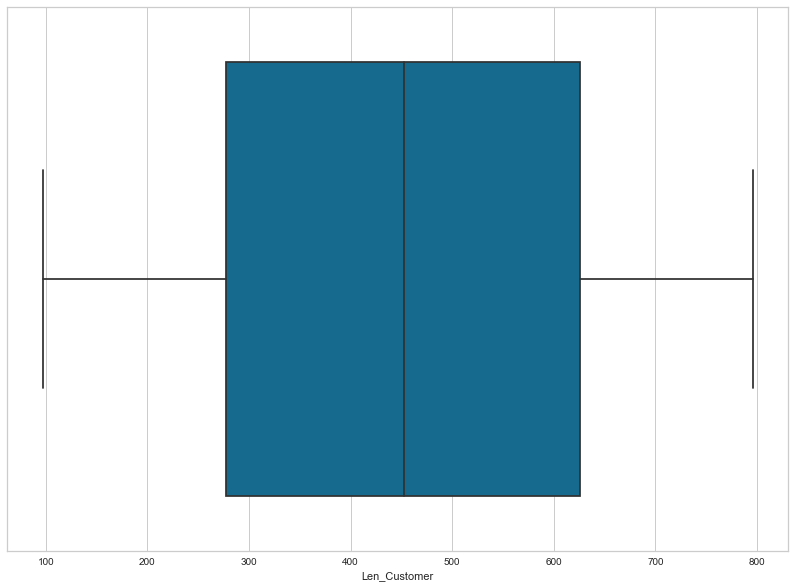

In [255]:
plt.figure(figsize=(14,10))

ax=sns.boxplot(x = 'Len_Customer', data = df)

##### Yes, there were 796 days between earliest and latest dates. Not sure why there were not customers who joined at the very end

In [264]:
df.Len_Customer.min()

97.0

<AxesSubplot:xlabel='Len_Customer', ylabel='Count'>

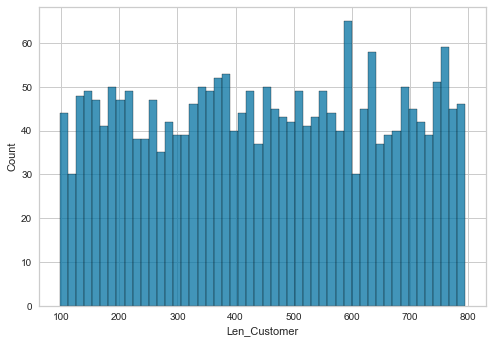

In [259]:
sns.histplot(data=df.Len_Customer, bins=50)

In [146]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,age,AcceptedCmpTot,Len_Customer,MntTotal,NumTotalPurchases
0,1826,1970,2,2,"$84,835.00",0,0,2014-06-16,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP,44,0,110.0,1190,16
1,1,1961,2,4,"$57,091.00",0,0,2014-06-15,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA,53,1,111.0,577,23
2,10476,1958,2,3,"$67,267.00",0,1,2014-05-13,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US,56,0,144.0,251,13
3,1386,1967,2,5,"$32,474.00",1,1,2014-05-11,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS,47,0,146.0,11,11
4,5371,1989,2,4,"$21,474.00",1,0,2014-04-08,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP,25,1,179.0,91,15


In [141]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', ' Income ',
       'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country', 'age',
       'AcceptedCmpTot', 'Len_Customer', 'MntTotal', 'NumTotalPurchases'],
      dtype='object')

In [154]:
#df.drop(['MntSpentByLenCustomer'],axis=1)
df['MntSpentNorm']=df['MntTotal']/df['Len_Customer']

<AxesSubplot:xlabel='MntSpentNorm', ylabel='Count'>

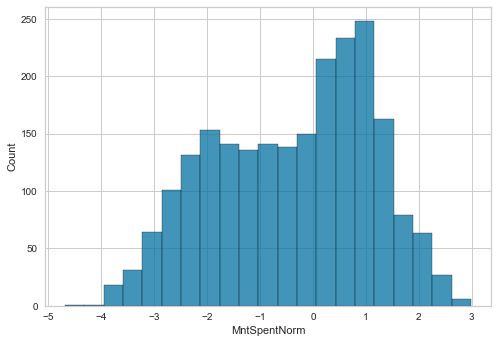

In [155]:
sns.histplot(np.log(df['MntSpentNorm'])) #Normalized amount spent
# I believe the negatives make sense since if we divide amount spend by a larger length customer 
# (eg, $100/200 days as customer), we'll have a number < 1=>Customer's hwo spend less than $1/day 
# will be mapped to the left of 0

/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


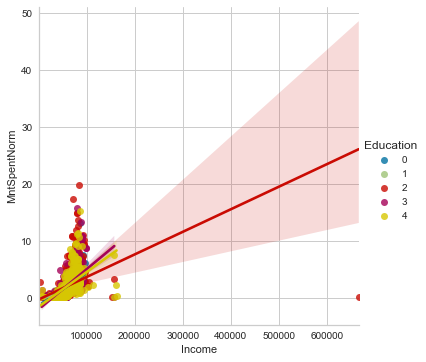

In [170]:
sns.lmplot("Income", "MntSpentNorm", df, hue='Education')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='Len_Customer', ylabel='MntTotal'>

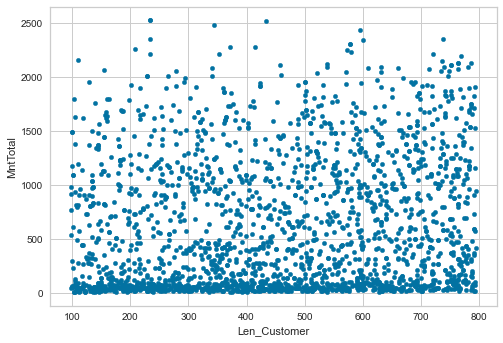

In [151]:
df_=df[['Len_Customer', 'MntTotal']]
df_.plot.scatter('Len_Customer','MntTotal')